In [13]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [15]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [18]:
# Set backend for matplotlib
matplotlib.use('Agg')  # ensuring the plot rendering backend is Agg if using plt
plt.switch_backend('Agg')

# Ensure inline plotting if necessary
%matplotlib inline

# For reproducibility
np.random.seed(42)

# Print version info (dry humor: because knowing our toolset is half the battle)
print("Libraries imported successfully. LFGOO!")

Libraries imported successfully. LFGOO!


In [23]:
# Data Loading and Inspection
try:
    # Load the dataset (we assume the file is in the same directory as the notebook)
    df = pd.read_csv('./products.csv', encoding='utf-8')
    print('Data loaded successfully.')
except Exception as e:
    print('Error loading data:', e)

# Display the first few rows to inspect the data
df.head()

Data loaded successfully.


,product_id,brand,title,price,category,rating,image_url,product_url
0,B08YRWN3WB,JANSPORT,Big Student Large laptop backpack Black EK0A5B...,189.00,New season,4.7,https://m.media-amazon.com/images/I/51y2EF0OmO...,https://www.amazon.ae/dp/B08YRWN3WB
1,B08YRXFZZM,JANSPORT,Superbreak Day Pack,119.00,New season,4.6,https://m.media-amazon.com/images/I/51yvvQUs3S...,https://www.amazon.ae/dp/B08YRXFZZM
2,B09Q2PQ7ZB,BAODINI,Mini Travel Umbrella With Case Small Compact U...,17.79,New season,4.2,https://m.media-amazon.com/images/I/71WbrZPbnG...,https://www.amazon.ae/dp/B09Q2PQ7ZB
3,B001BEAWXY,Calvin Klein,Men's Cotton Classics 3-Pack Boxer Brief,119.00,New season,4.2,https://m.media-amazon.com/images/I/716vzeqa7Z...,https://www.amazon.ae/dp/B001BEAWXY
4,B09FM5PMN3,JANSPORT,Unisex Kids Bag Backpack,179.00,New season,4.4,https://m.media-amazon.com/images/I/51XASBuqjr...,https://www.amazon.ae/dp/B09FM5PMN3


In [48]:
df["product_url"][1]

'https://www.amazon.ae/dp/B08YRXFZZM'

product_id     0
brand          1
title          1
price          0
category       0
rating         0
image_url      0
product_url    0
dtype: int64


In [57]:
# Data Cleaning and Preprocessing
# We inspect columns and data types
print('Data Info:')
df.info()

# For this dataset, we focus on the following columns: price, rating, brand, and category
# We assume product_id, title, image_url, and product_url are not needed for our analysis

# Check for missing values
missing_vals = df.isnull().sum()
print('\nMissing values in each column:')
print(missing_vals)

# If there are missing values in 'price' or 'rating', we drop those rows as they are crucial for analysis
df = df.dropna(subset=['price', 'rating'])

# Convert price and rating to numeric if they are null
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop again any rows that might have become NaN
df = df.dropna(subset=['price', 'rating'])

# Reset index after drops
df.reset_index(drop=True, inplace=True)

print('\nCleaned data info:')
df.info()

# Note: In case any other notebook creator encounters errors when converting data types,
# using pd.to_numeric with errors='coerce' is a reliable method to handle unexpected non-numeric values.

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   12086 non-null  object 
 1   brand        12085 non-null  object 
 2   title        12085 non-null  object 
 3   price        12086 non-null  float64
 4   category     12086 non-null  object 
 5   rating       12086 non-null  float64
 6   image_url    12086 non-null  object 
 7   product_url  12086 non-null  object 
dtypes: float64(2), object(6)
memory usage: 755.5+ KB

Missing values in each column:
product_id     0
brand          1
title          1
price          0
category       0
rating         0
image_url      0
product_url    0
dtype: int64

Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_i

Starting Exploratory Data Analysis...


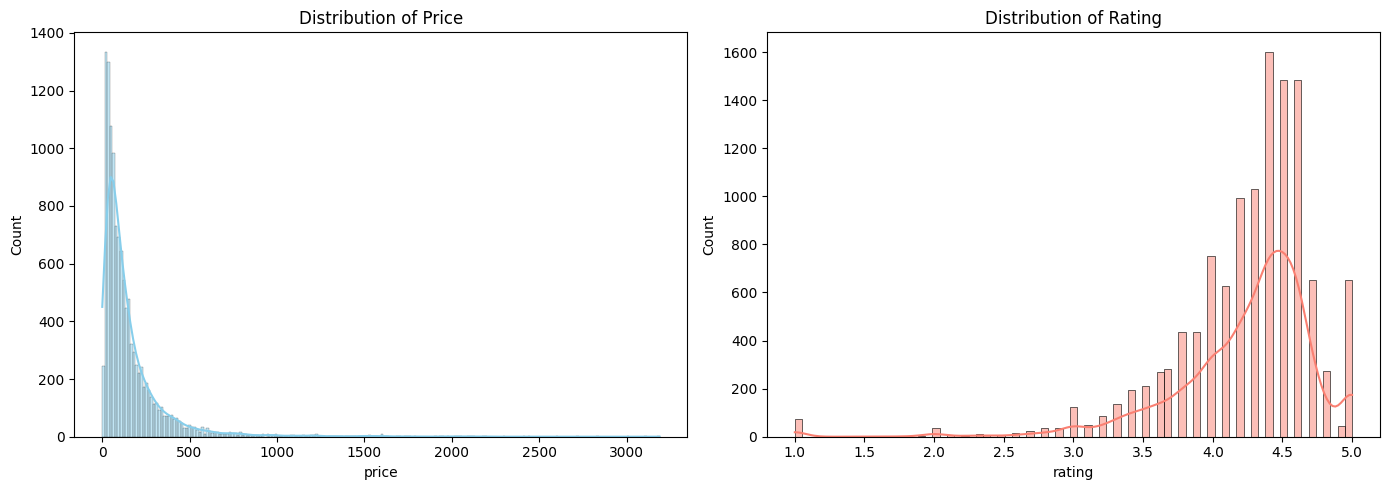

In [ ]:

# Exploratory Data Analysis
print('Starting Exploratory Data Analysis...')

# Histograms for numeric features: price and rating
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['price'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Price')

sns.histxplot(df['rating'], ax=axes[1], kde=True, color='salmon')
axes[1].set_title('Distribution of Rating')

plt.tight_layout()
plt.show()


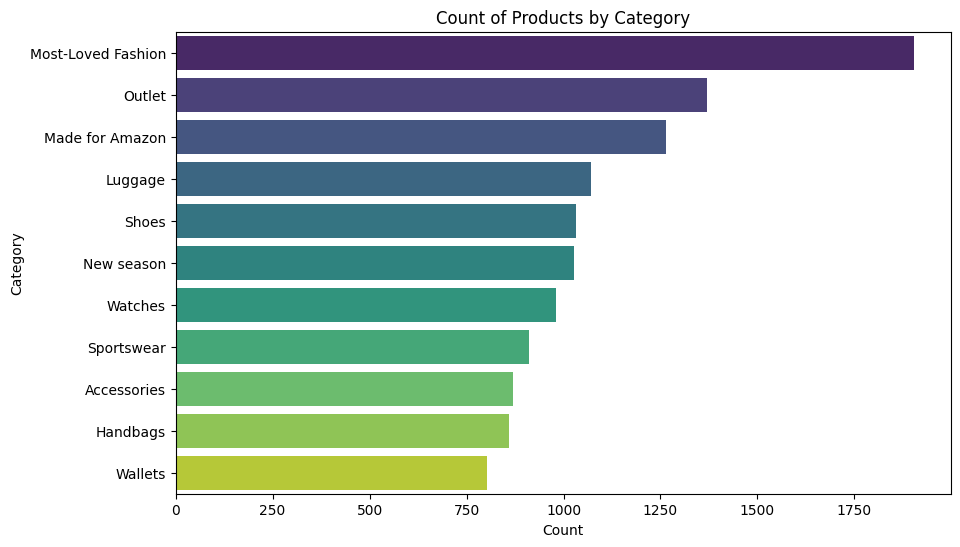

In [63]:

# Pie Chart (using countplot) for category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')
plt.title('Count of Products by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


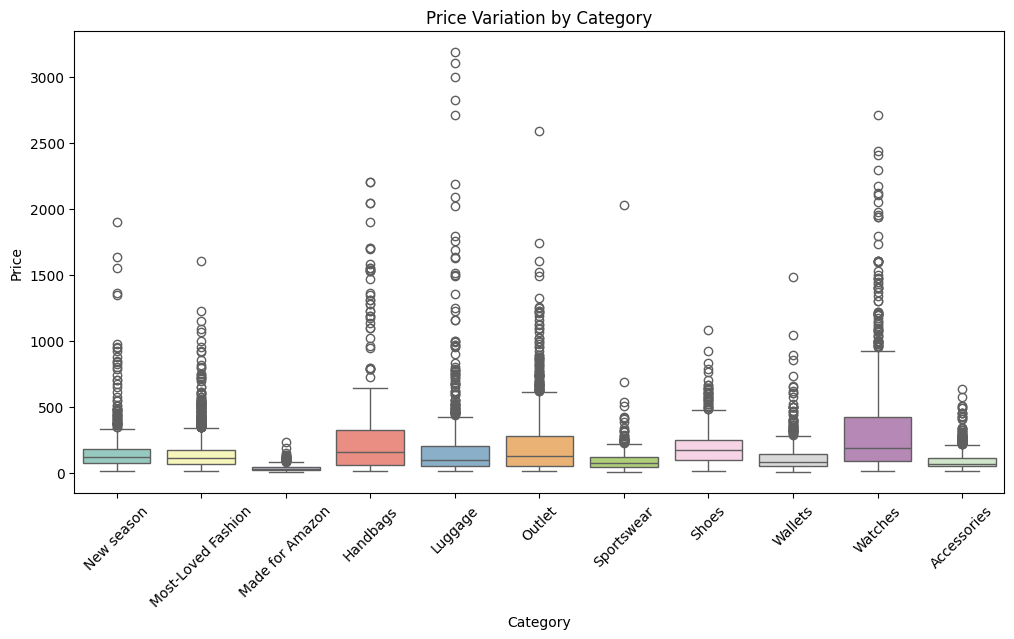

In [68]:
# Box Plot comparing price across categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='price', data=df, palette='Set3')
plt.title('Price Variation by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


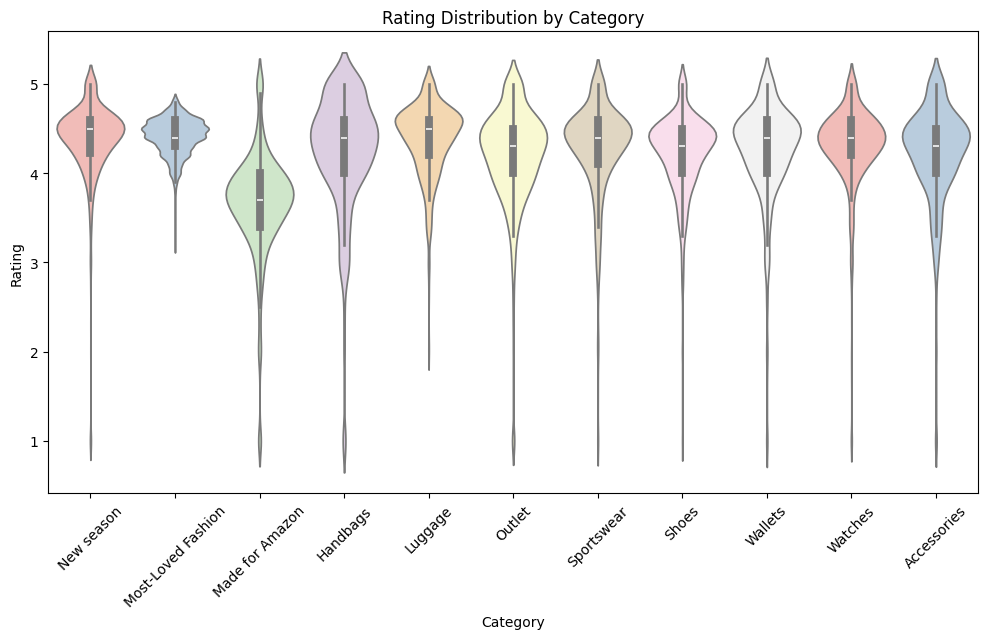

In [61]:

# Violin Plot to see distribution of ratings by category
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='rating', data=df, palette='Pastel1')
plt.title('Rating Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Note: While a correlation heatmap is often useful, our numeric dataframe only contains price and rating, 
# which is less than the 4-column threshold. Additional numeric features would be needed for that analysis.

In [70]:
!pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 2.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/8.7 MB 2.3 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.7 MB 2.3 MB/s eta 0:00:04
   --------- ------------------------------ 2.1/8.7 MB 2.3 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.7 MB 2.3 MB/s eta 0:00:03
   ------------- -------------------------- 2.9/8.7 MB 2.3 MB/s eta 0:00:03
   --------------- ------------------------ 3.4/8.7 MB 2.2 MB/s eta 0:00:03
   ------------------ --------------------- 3.9/8.7 MB 2.2 MB/s eta 0:00:03
   ------------------- -------------------- 4.2/8.7 MB 2.2 MB/s eta 0:00:03
   --------------------- ------------------ 4.7/8.7 MB 2.2 MB/s eta 0:00:02
   ------------------------ --------------- 5.2/8.7 MB 2.2 MB/s eta 0:00:02
   -----------------------

In [71]:
# Prediction Analysis
# We will predict the product rating based on price and category.
# Although one might argue that fashion products should be rated on style rather than price, let's see if there's a relationship.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


R^2 score for the RandomForest model: 0.02963930261290293


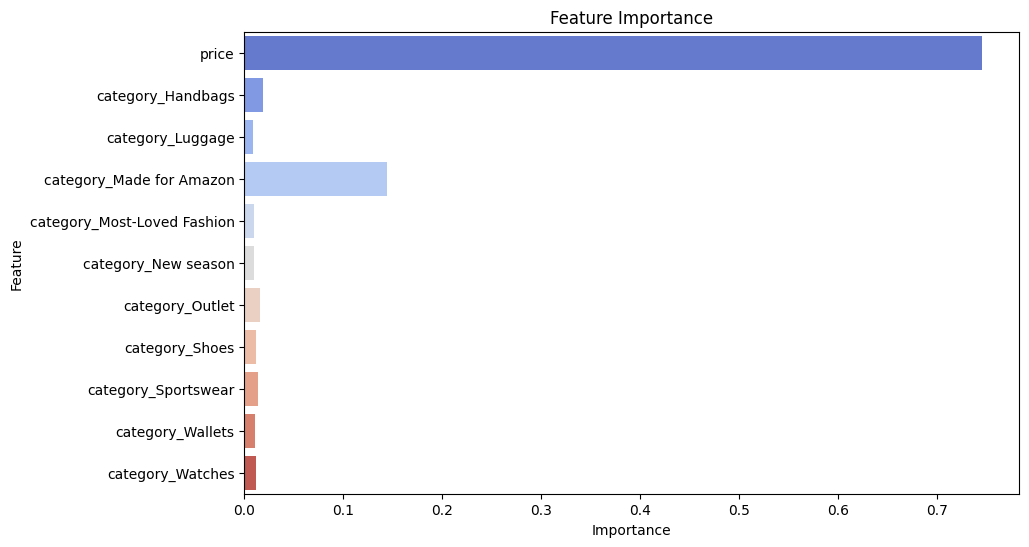

In [72]:

# For simplicity, we use price and category as predictors.
# Convert 'category' into dummy/indicator variables
df_model = df[['price', 'rating', 'category']].copy()
df_model = pd.get_dummies(df_model, columns=['category'], drop_first=True)

# Features and target
X = df_model.drop('rating', axis=1)
y = df_model['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Compute R^2 score
score = r2_score(y_test, y_pred)
print('R^2 score for the RandomForest model:', score)

# Permutation Importance (using a simple approach)
importances = rf.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='coolwarm')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()